# Double Pendulum Simulation
When a pendulum is attached to another pendulum at other end, it is double pendulum. In this HW, the motions of the pendulum will be found out through Lagrangian formulation.

In [28]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from IPython.display import Image

The setup for the double pendulum can be seen in the below image. $l_1 , l_2 , m_1 , m_2$ are the constant in the setup for double pendulum. The variables that will affect the position of the pendulums are $\theta_1$ and $\theta_2$. 

In [29]:
Image(url='https://www.researchgate.net/profile/Iman-Izadgoshasb/publication/331024972/figure/fig1/AS:725254309699586@1549925510035/Double-pendulum-system.png')

As $L = T - U$,

The kinetic energy, T, for the double pendulum is as follow:
$T = 1/2 (m_1 + m_2) L_1^2 \dot{\theta_1}^2 + m_2 L_1 L_2 \dot{\theta_1}^2 \dot{\theta_2}^2 cos(\theta_1 - \theta_2) + 1/2 m_2 L_2^2 \dot{\theta_2}^2$

The potential energy, U, for the double pendulum is as follow:
$U = (m_1 + m_2) g L_1 (1 - cos \theta_1) + m_2 g L_2 (1 - cos \theta_2)$

Therefore, $L = 1/2 (m_1 + m_2) L_1^2 \dot{\theta_1}^2 + m_2 L_1 L_2 \dot{\theta_1}^2 \dot{\theta_2}^2 cos(\theta_1 - \theta_2) + 1/2 m_2 L_2^2 \dot{\theta_2}^2 - (m_1 + m_2) g L_1 (1 - cos \theta_1) - m_2 g L_2 (1 - cos \theta_2)$

The Euler-Lagrange equation is as followed:

<font size="5">$\frac{d}{dt} (\frac{\partial L}{\partial \dot{q_i}}) - \frac{\partial L}{\partial q_i} = 0$ for $q_i = \theta_1, \theta_2$</font> 

By finding the equation through the Euler-Lagrange equation, we can rearrange and substitute the two equations and make two second order differential equations. Let $z_1 = \dot{\theta_1}, z_2 = \dot{\theta_2}, therefore, \dot{z_1} = \ddot{\theta_1}, \dot{z_2} = \ddot{\theta_2}$. Therefore, the second order differential equation can be expressed as followed:

<font size="5"> $ \dot{z_1} = \frac{m_2 g sin \theta_2 cos(\theta_1 - \theta_2) - m_2 sin(\theta_1 - \theta_2)[l_1 z_1^2 cos(\theta_1 - \theta_2) + l_2 z_2^2] - (m_1 + m_2) g sin\theta_1}{l_1 [m_1 + m_2 sin^2 (\theta_2 - \theta_2)]} $ </font>

<font size="5"> $ \dot{z_2} = \frac{(m_1 + m_2)(l_2 z_1^2 sin(\theta_1 - \theta_2) - gsin\theta_2 + g sin \theta_1 cos(\theta_1 - \theta_2)) + m_2 l_2 z_2^2 sin(\theta_1 - \theta_2)cos(\theta_1 - \theta_2)}{l_2[m_1 + m_2 sin^2 (\theta_1 - \theta_2)]} $ </font>

Therefore, by using the above differential equation, we can calculate its result using ODE. 

In [78]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L1, L2 : float
        length of the simple pendulum
    g : float
        gravitational acceleration at the earth's surface 
    m1, m2 : float
        mass of pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            z1_dot and z2_dot
            
        Returns
        -------
        
        """
        
        theta1, z1, theta2, z2 = y
        
        theta1_dot = z1
        z1_dot = (self.m2 * self.g * np.sin(theta2) * np.cos(theta1 - theta2) - self.m2 * np.sin(theta1 - theta2) \
                 *(self.L1 * z1**2 * np.cos(theta1 - theta2) + self.L2 * z2**2) - (self.m1 + self.m2) * self.g * \
                 np.sin(theta1)) / (self.L1 * (self.m1 + self.m2 * np.sin(theta1 - theta2)**2))
        
        theta2_dot = z2
        z2_dot = ((self.m1 + self.m2) * (self.L1 * z1**2 * np.sin(theta1 - theta2) - self.g*np.sin(theta2) + self.g * \
                 np.sin(theta1) * np.cos(theta1 - theta2)) + self.m2 * self.L2 * z2**2 * np.sin(theta1 - theta2) * \
                 np.cos(theta1 - theta2) / (self.L2 * (self.m1 + self.m2*np.sin(theta1 - theta2)**2)))
        
        return theta1_dot, z1_dot, theta2_dot, z2_dot
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y

        return theta1, theta1_dot, theta2, theta2_dot

In [90]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [91]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [92]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.0001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.

# Instantiate a pendulum 
p1 = DoublePendulum(L1=L1, L2=L2, m1=m1, m2=m2, g=g)


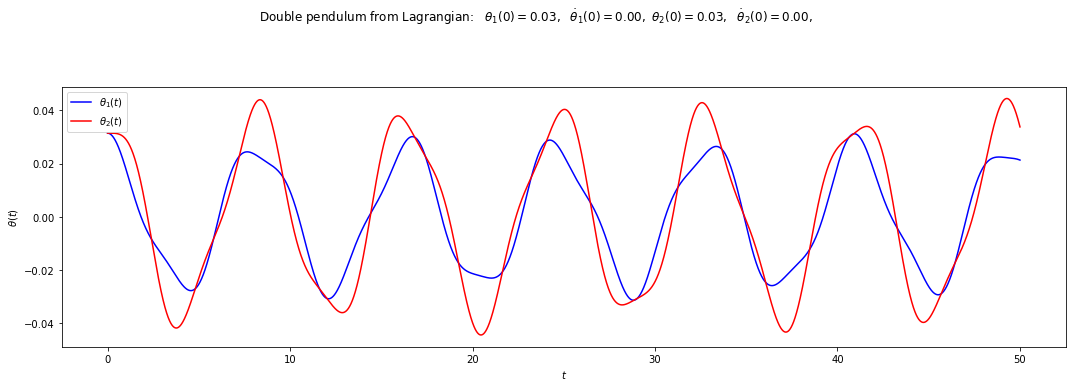

In [93]:
# both plots: same initial conditions
theta1_0 = np.pi/100
theta1_dot_0 = 0.
theta2_0 = np.pi/100
theta2_dot_0 = 0.

theta1, theta_dot, theta2, theta2_dot = p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            ax=ax_a)    

plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            ax=ax_a)  
                              
fig.tight_layout()
fig.savefig('double_pendulum_Lagrange1.png', bbox_inches='tight')  

# Chaotic system when small angle change in initial condition

The simulation below shows that when the initial condition has a small angle change in the initial condition, the system will become chaotic. The plot below shows that when 1 of the initial condition has a difference in 0.000001, the difference of $\theta_1$ and $\theta_2$ will be huge, as time go by.

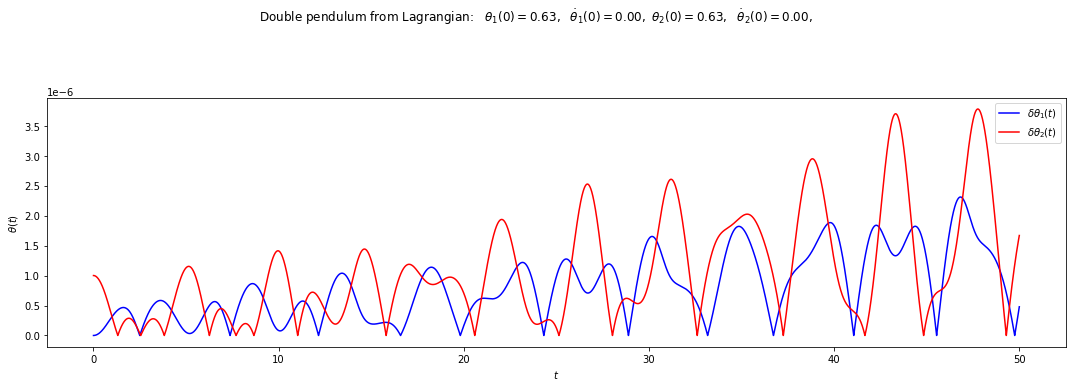

In [94]:
#same initial conditions
theta1_0 = np.pi/5
theta1_dot_0 = 0.
theta2_0 = np.pi/5
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
theta11, theta11_dot, theta22, theta22_dot = p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0-0.000001, theta2_dot_0)

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start:stop]-theta11[start:stop]),
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\delta\theta_1(t)$', 
            ax=ax_a)    

plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start:stop]-theta22[start:stop]),
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\delta\theta_2(t)$', 
            ax=ax_a)  
                              
fig.tight_layout()
fig.savefig('double_pendulum_Lagrange2.png', bbox_inches='tight')  

# Animating the double pendulum

In [100]:
#Generate coordinate for the mass of the pendulum
def coordinate(x0, y0, theta, L):

    x = x0 + L*np.sin(theta)
    y = y0 - L*np.cos(theta)
    
    return x,y

In [101]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 500.
delta_t = 0.1

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

In [106]:
#Instantiate initial condition
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
#The intitial condition of theta2_0 has a difference in 0.000001 with the original 0.000001
theta1a, theta1a_dot, theta2a, theta2a_dot = p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0-0.000001, theta2_dot_0)

In [107]:
%%capture

x_max = 3.0
x_min = -x_max
y_max = 3.0
y_min = -y_max
x0 = 0.0
y0 = 0.0 

fig_anim = plt.figure(figsize=(5,5), num='Double Pendulum')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.
p0_anim, = ax_anim.plot(x0, y0, 'o', markersize = 4, color='blue')

#Blue line and dot is the simulation for the initial condition that does not have small angle change
x1, y1 = coordinate(x0, y0, theta1[0], p1.L1)
p1_anim, = ax_anim.plot(x1, y1, 'o', markersize = 4, color='blue')
ln1_anim, = ax_anim.plot([x0,x1], [y0,y1], color = 'blue', lw=2)

x2, y2 = coordinate(x1, y1, theta2[0], p1.L2)
p2_anim, = ax_anim.plot(x2, y2, 'o', markersize = 4, color='blue')
ln2_anim, = ax_anim.plot([x1,x2], [y1,y2], color = 'blue', lw=2)

"""
Second pendulum design.
"""
#Blue line and dot is the simulation for the initial condition that has small angle change
x1a, y1a = coordinate(x0, y0, theta1a[0], p1.L1)
p1a_anim, = ax_anim.plot(x1a, y1a, 'o', markersize = 4, color='green')
ln1a_anim, = ax_anim.plot([x0,x1a], [y0,y1a], color = 'green', lw=2)

x2a, y2a = coordinate(x1a, y1a, theta2a[0], p1.L2)
p2a_anim, = ax_anim.plot(x2a, y2a, 'o', markersize = 4, color='green')
ln2a_anim, = ax_anim.plot([x1a,x2a], [y1a,y2a], color = 'green', lw=2)

ax_anim.set_aspect(1)
fig_anim.tight_layout()

In [108]:
def animate_double_pendulum(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    x0 = 0
    y0 = 0
    p0_anim.set_data(x0, y0)

    x1, y1 = coordinate(x0, y0, theta1[i], p1.L1)
    p1_anim.set_data(x1, y1)
    ln1_anim.set_data([x0,x1], [y0,y1])

    x2, y2 = coordinate(x1, y1, theta2[i], p1.L2)
    p2_anim.set_data(x2, y2)
    ln2_anim.set_data([x1,x2], [y1,y2])
    
    x1a, y1a = coordinate(x0, y0, theta1a[i], p1.L1)
    p1a_anim.set_data(x1a, y1a)
    ln1a_anim.set_data([x0,x1a], [y0,y1a])

    x2a, y2a = coordinate(x1a, y1a, theta2a[i], p1.L2)
    p2a_anim.set_data(x2a, y2a)
    ln2a_anim.set_data([x1a,x2a], [y1a,y2a])


    return (p0_anim, p1_anim, ln1_anim, p2_anim, ln2_anim, 
            p1a_anim, ln1a_anim, p2a_anim, ln2a_anim)   # this is needed for blit=True to work

In [109]:
frame_interval = 20.  # time between frames
frame_number = 1001  # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_double_pendulum, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

#fig.show()

HTML(anim.to_jshtml())

The pendulum simulation above shows that the pendulum will oscillate differently when there are small angle change in the initial condition. The blue pendulum does not have small angle change, while the green pendulum has small angle change. The simulation shows that they might have the smae pattern in the begging but as time go by, there will be difference in them.